<font size="6">**Classifiying Credit Risk: A Systematic Approach**</font>

<font size="4">ID/X Partners - Data Scientist</font>

Author : Annisa Sekartierra Mulyanto

<a name="0"></a>
## 0 - Intro
### Library

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add other

In [97]:
from google.colab import drive
drive.mount('/content/drive')

### Metadata

In [118]:
df_var = pd.read_excel('/content/drive/MyDrive/coolyeah/rakamin/LCDataDictionary (1).xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
display(df_var)

,Kolom,Deskripsii,Keterangan
0,member_id,A unique LC assigned Id for the borrower member.,id unik LC untuk setiap anggota peminjam
1,loan_amn,Last month payment was received,pembayaran yang diterima bulan lalu
2,funded_amnt,The total amount committed to that loan at that point in time.,komitment total pembayaran setiap bulannya
3,funded_amnt_inv,?,NaN
4,term,The number of payments on the loan. Values are in months and can be either 36 or 60.,berapa bulan ia meminjam
5,int_rate,"Indicates if income was verified by LC, not verified, or if the income source was verified",tingkat rating verified LC
6,installment,The monthly payment owed by the borrower if the loan originates.,NaN
7,grade,NaN,NaN
8,sub_grade,NaN,NaN
9,emp_title,pekerjaan member,NaN


Teridentifikasi bahwa variabel target adalah `loan_status`

### Dataset

In [99]:
df= pd.read_csv('/content/drive/MyDrive/coolyeah/rakamin/loan_data_2007_2014.csv')
pd.set_option('display.max_colwidth', None)
display(df)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

<a name="1"></a>
## 1 - Data Understanding

Variabel target pada data yang digunakan adalah `loan_status` yang menunjukkan status peminjaman saat ini. Pada kolom ini terdapat 7 kategori dengan penjelasan sebagai berikut:

- **Current**: Pinjaman up-to-date pada semua pembayaran yang belum dilunasi.
- **In Grace Period**: Pinjaman sudah jatuh tempo tetapi masih dalam periode tenggang 15 hari.
- **Late (16-30)**: Pinjaman tidak up-to-date selama 16 hingga 30 hari.
- **Late (31-120)**: Pinjaman tidak up-to-date selama 31 hingga 120 hari.
- **Fully paid**: Pinjaman telah dilunasi sepenuhnya, baik pada akhir periode 3 atau 5 tahun atau sebagai hasil dari pelunasan di muka.
- **Default**: Pinjaman tidak up-to-date untuk jangka waktu yang lama.
- **Charged Off**: Pinjaman yang tidak lagi diharapkan untuk menerima pembayaran lebih lanjut.

Kami mengidentifikasikan suatu **pinjaman yang baik** (1) apabila status pinjaman saat ini berada pada kategori ‘Current’, ‘In Grace Period’, dan ‘Fully Paid’. Sedangkan kategori yang lainnya akan diidentifikasikan sebagai **pinjaman yang tidak baik** (0)

<a name="2"></a>
## 2 - Preprocessing Data (1.1)
Dilakukan data cleaning dengan tujuan memperbaiki atau menghapus kesalahan, ketidakkonsistenan, dan ketidakakuratan dalam kumpulan data.



---
**Cek Duplikasi**


In [101]:
df.duplicated().sum()
# tidak ada duplikasi

0

---
**Cek Kolom Dengan seluruh value NaN**

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


Akan dihapuskan kolom-kolom berisi NaN yang tidak dapat digunakan pada analisis.

In [103]:
df1 = df.dropna(axis=1, how='all')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Akan dihapuskan juga kolom-kolom yang tidak memiliki hubungan langsung dengan tujuan analisis, yaitu kolom unnamed, url, desc, title, dan zip_code. Kolom unnamed berisikan indeks data yang tidak dibutuhkan sebagai variabel. Kolom url, desc, dan title mengandung informasi teks mengenai member yang tidak dapat dilakukan analisis sesuai dengan tujuan. Kolom zip_code berisikan kode pos yang memiliki nilia berbeda untuk setiap member dan memiliki informasi yang sama dengan kolom addr_state sebagai informasi mengenai alamat.

Oleh karena itu, keempat kolom tidak akan diikutkan pada analisis dan dihapuskan pada step berikut.

Akan dihapus pula kolom id dan member_id karena memiliki nilai unik untuk setiap member sehingga tidak membantu dalam analisis kedepannya.

In [104]:
df1 = df1.drop(['Unnamed: 0', 'url', 'desc', 'title', 'zip_code', 'id', 'member_id'], axis = 1)

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

---
**Cek Kolom Object**

Selanjutnya akan dicek nilai-nilai unik dari variabel kategorik untuk melihat apakah terdapat data yang memiliki format berbeda atau tidak masuk akal.

In [106]:
var_cat = df1.select_dtypes(include = 'object').columns #ambil kolom kategorik

# cek unique values dari tiap kolom kategorik
for kolom in var_cat:
    unique = df1[kolom].unique()
    print(f"Kolom : {kolom} \n {unique}\n\n")

Kolom : term 
 [' 36 months' ' 60 months']


Kolom : grade 
 ['B' 'C' 'A' 'E' 'F' 'D' 'G']


Kolom : sub_grade 
 ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


Kolom : emp_title 
 [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']


Kolom : emp_length 
 ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


Kolom : home_ownership 
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']


Kolom : verification_status 
 ['Verified' 'Source Verified' 'Not Verified']


Kolom : issue_d 
 ['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 

Ditemukan beberapa kolom yang memuat informasi mengenai tanggal masih terformat sebagai object. Terdapat pula kolom object yang memiliki missing values. Selain itu terdapat suatu kolom yang hanya memiliki satu kategori, yaitu kolom `aplication_type` yang mana akan dihapuskan karena tidak berguna dalam proses analisis.


In [107]:
df1 = df1.drop(['application_type'], axis = 1)

In [108]:
df2 = df1.copy()

In [109]:
# menambahkan tanggal day pada setiap value dan dianggap sebagai awal bulan
# agar dapat diubah format date
date_format = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

df2[date_format] = df2[date_format].apply(lambda x: '01-' + x)

In [110]:
df2[date_format].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,01-Dec-11,01-Jan-85,01-Jan-15,NaN,01-Jan-16
1,01-Dec-11,01-Apr-99,01-Apr-13,NaN,01-Sep-13
2,01-Dec-11,01-Nov-01,01-Jun-14,NaN,01-Jan-16
3,01-Dec-11,01-Feb-96,01-Jan-15,NaN,01-Jan-15
4,01-Dec-11,01-Jan-96,01-Jan-16,01-Feb-16,01-Jan-16


In [111]:
for col in date_format:
    df2[col] = pd.to_datetime(df2[col], format='%d-%b-%y')

df2[date_format].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,NaT,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,NaT,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,NaT,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,NaT,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-02-01,2016-01-01


Selanjutnya juga akan di cek jumlah nilai unik untuk setiap kolom object.

In [112]:
object_columns = df2.select_dtypes(include=['object']).columns
df2[object_columns].nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
loan_status                 9
pymnt_plan                  2
purpose                    14
addr_state                 50
initial_list_status         2
dtype: int64

Kolom `emp_title` memiliki 200 ribu lebih nilai unik. Dikarena kurangnya pengetahuan mengenai tipe pekerjaan setiap nilai unik tersebut kami tidak dapat melakukan rekategorisasi pekerjaan. Dengan banyaknya kategori ini akan meningkatkan kinerja komputasi dan berisiko mengurangi akurasi model. Oleh karena itu kami rasa akan lebih baik untuk menghilangkan fitur ini dibandingkan melakukan ekstraksi fitur atau menggunakan fitur ini apa adanya.

Selanjutnya akan dihapus kolom `emp_title`

In [113]:
df2 = df2.drop(['emp_title'], axis = 1)

selanjutnya pula akan dicek jumlah setiap nilai unik untuk setiap kolom kategorik.

In [114]:
object_columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

In [115]:
object_columns = df2.select_dtypes(include=['object']).columns

In [116]:
unik_cat = {}
for col in object_columns:
    unik_cat[col] = df2[col].value_counts()

# Menampilkan hasil
for col, counts in unik_cat.items():
    print(f"Jumlah nilai unik untuk kolom '{col}':")
    print(counts)
    print()

Jumlah nilai unik untuk kolom 'term':
term
 36 months    337953
 60 months    128332
Name: count, dtype: int64

Jumlah nilai unik untuk kolom 'grade':
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64

Jumlah nilai unik untuk kolom 'sub_grade':
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64

Jumlah nilai unik untuk kolom 'emp_length':
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       261

---
**Cek Variabel Numerik**

In [117]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
loan_amnt,466285.0,14317.277577,500.0,8000.0,12000.0,20000.0,35000.0,8286.509164
funded_amnt,466285.0,14291.801044,500.0,8000.0,12000.0,20000.0,35000.0,8274.3713
funded_amnt_inv,466285.0,14222.329888,0.0,8000.0,12000.0,19950.0,35000.0,8297.637788
int_rate,466285.0,13.829236,5.42,10.99,13.66,16.49,26.06,4.357587
installment,466285.0,432.061201,15.67,256.69,379.89,566.58,1409.99,243.48555
annual_inc,466281.0,73277.38147,1896.0,45000.0,63000.0,88960.0,7500000.0,54963.568654
issue_d,466285,2013-08-23 15:33:29.494623232,2007-06-01 00:00:00,2013-03-01 00:00:00,2014-01-01 00:00:00,2014-07-01 00:00:00,2014-12-01 00:00:00,NaN
dti,466285.0,17.218758,0.0,11.36,16.87,22.78,39.99,7.851121
delinq_2yrs,466256.0,0.284678,0.0,0.0,0.0,0.0,29.0,0.797365
earliest_cr_line,466256,1997-12-16 11:57:43.058920192,1969-01-01 00:00:00,1994-03-01 00:00:00,1999-03-01 00:00:00,2002-09-01 00:00:00,2068-12-01 00:00:00,NaN


Terlihat disini bahwa variabel policy_code memiliki nilia yang sama untuk seluruh datanya karena memiliki nilia max dan min yang sama dan standar deviasi bernilai nol. Oleh karena itu, akan dihapuskan kolom `policy_code` sebagai berikut.

In [91]:
df_p1 = df2.drop(['policy_code'], axis =1)



---
**Rekategorisasi Variabel Target**

Akan dilakukan rekategorisasi variabel target `loan_status` menjadi 0 (Tidak Baik) atau 1 (Baik) bedasarkan business understanding.

In [119]:
df_p1['loan_status'] = df_p1['loan_status'].replace(['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid'], 1).replace(['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off'], 0)
df_p1['loan_status'].value_counts()

loan_status
1    414099
0     52186
Name: count, dtype: int64

<a name="3"></a>
## 3 - Exploratory Data Analysis (EDA)
Tahapan ini dilakukan untuk mendapatkan insight yang bermanfaat dari data.

#### 3.1 - Bagaimana sebaran proporsi pada label target (`loan_status`)?


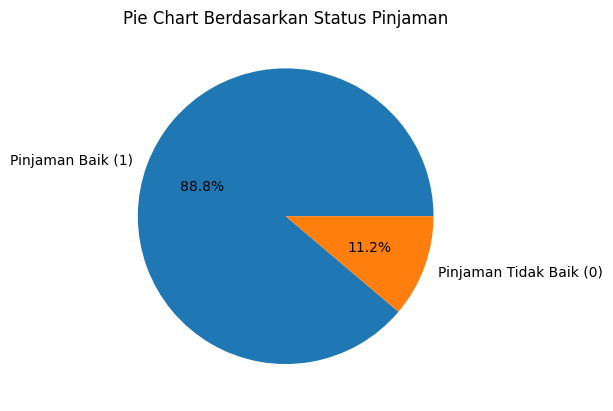

In [121]:
valpie = df_p1['loan_status'].value_counts().values
labelpie = df_p1['loan_status'].unique().tolist()
plt.pie(valpie, labels=['Pinjaman Baik (1)', 'Pinjaman Tidak Baik (0)'], autopct='%1.1f%%')
plt.title('Pie Chart Berdasarkan Status Pinjaman')
plt.show()

**JAWAB:**<br>
Sebagian besar dari data peminjam memiliki nilai variabel target 'loan_status' 1 atau pinjaman yang baik yaitu sekitar 88,8%. Sisanya memiliki nilai 0 artinya pinjaman tidak baik. Dari sini kami mengetahui bahwa terdapat ketidakseimbangan variabel target.

#### 3.2 - Bagaimana grade peminjam dengan status pinjaman saat ini?

Text(0.5, 1.0, 'Stacked Bar Chart')

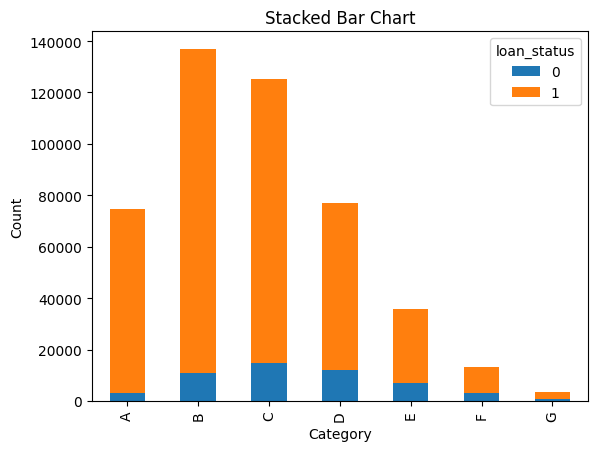

In [122]:
group_counts = df_p1.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart
group_counts.plot(kind='bar', stacked=True)

# Menambahkan label dan judul
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frekuensi Grade untuk setiap Loan Status')

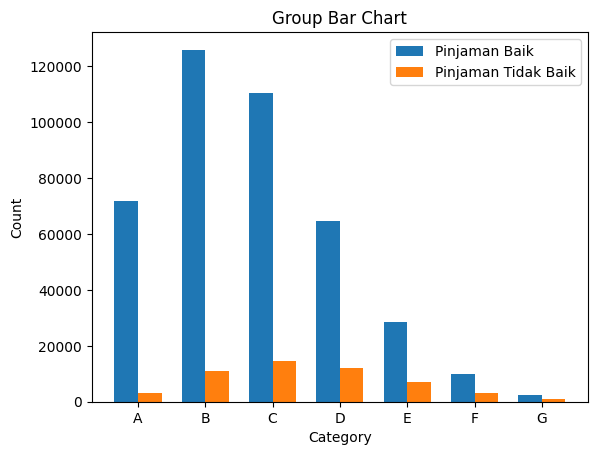

In [128]:
group_counts = {}
for category, group in zip(df_p1['grade'], df_p1['loan_status']):
    if category not in group_counts:
        group_counts[category] = [0, 0]
    group_counts[category][group - 1] += 1

# Mengurutkan kategori
sorted_categories = sorted(group_counts.keys())

# Persiapan untuk plot
num_categories = len(sorted_categories)
bar_width = 0.35
index = np.arange(num_categories)

# Plot
fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width/2, [group_counts[category][0] for category in sorted_categories], bar_width, label='Pinjaman Baik')
bar2 = ax.bar(index + bar_width/2, [group_counts[category][1] for category in sorted_categories], bar_width, label='Pinjaman Tidak Baik')

# Label dan judul
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Group Bar Chart')
ax.set_xticks(index)
ax.set_xticklabels(sorted_categories)
ax.legend()

# Menampilkan plot
plt.show()

**JAWAB:**<br>

Secara keseluruhan kebanyakan peminjam dengan kategori pinjaman baik memiliki grade B sedangkan kebanyakan peminjam dengan kategori pinjaman tidak baik memiliki grade C.

#### 3.3 - Bagaimana korelasi antar fitur numerik?


<Axes: >

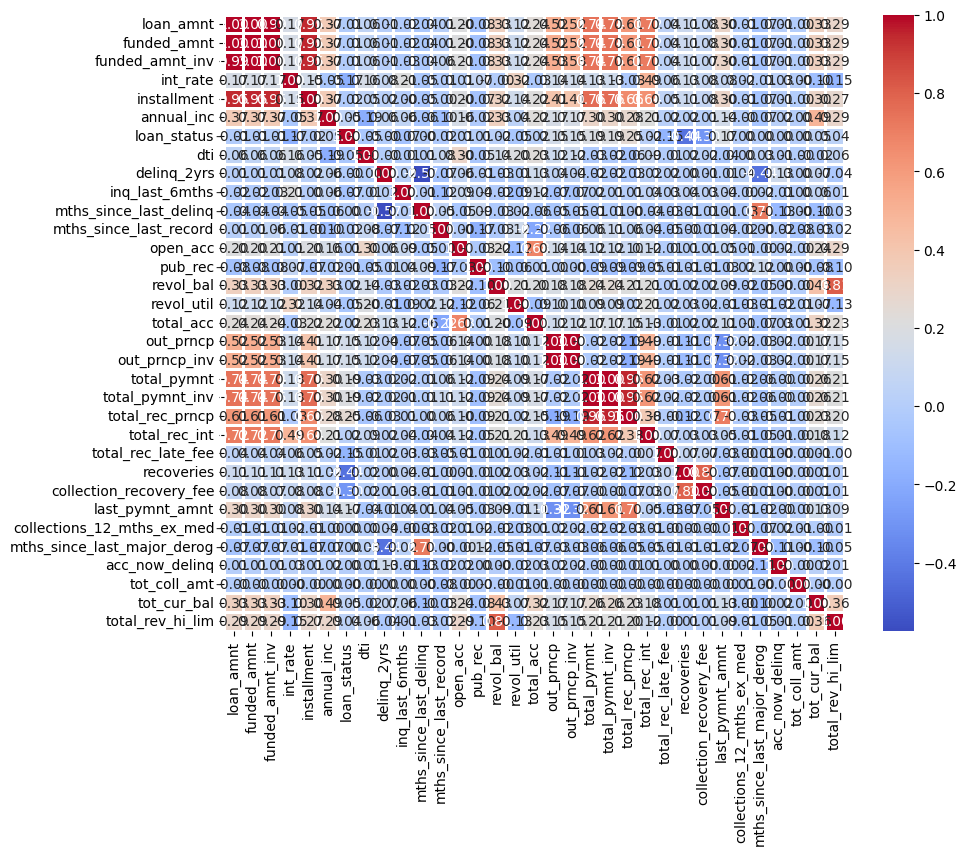

In [129]:
cor1 = df_p1.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(cor1,cmap='coolwarm',annot=True,linecolor='white',linewidths=1, fmt = '.2f')

<Axes: >

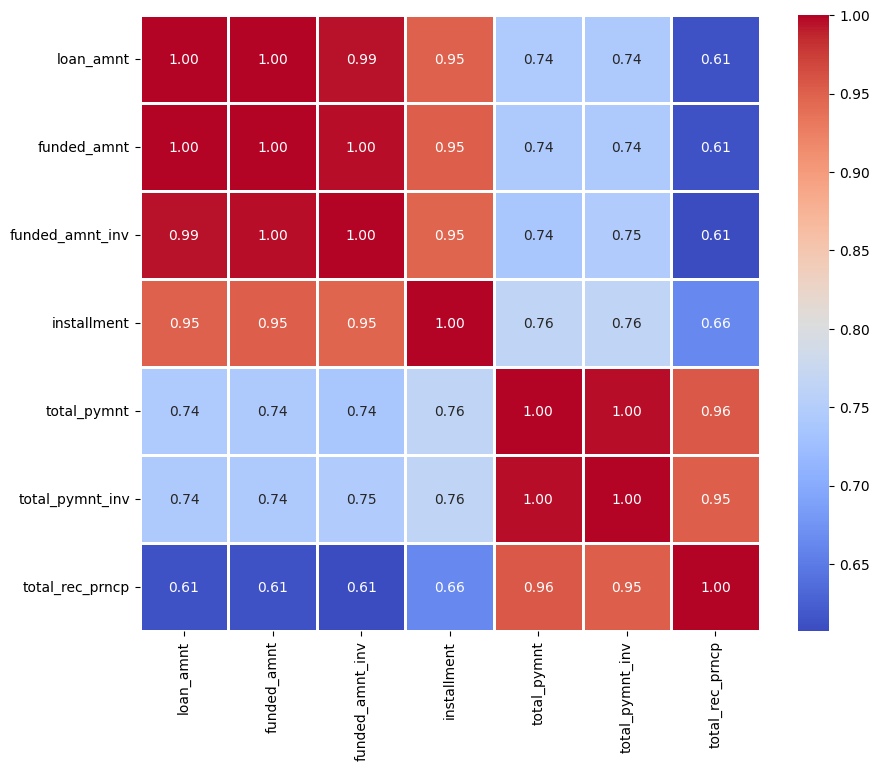

In [220]:
core = df_p1[['loan_amnt','funded_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv', 'total_rec_prncp']]
cor2 = core.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(cor2,cmap='coolwarm',annot=True,linecolor='white',linewidths=1, fmt = '.2f')

**JAWAB:**<br>
Terdapat korelasi yang kuat antara beberapa fitur. hal ini mungkin akan mengakibatkan multikolinearitas. Oleh karena itu akan dilakukan tahapan pengatasan permasalahan ini salah satunya dengan PCA nantinya.

#### 3.4 - Bagaimana distribusi installment dan loan amount untuk setiap loan status?

<ipython-input-221-849a82bdc9f4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s1,  color='blue', label='Pinjaman Tidak Baik')
<ipython-input-221-849a82bdc9f4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s2, color='orange', label='Pinjaman Baik')


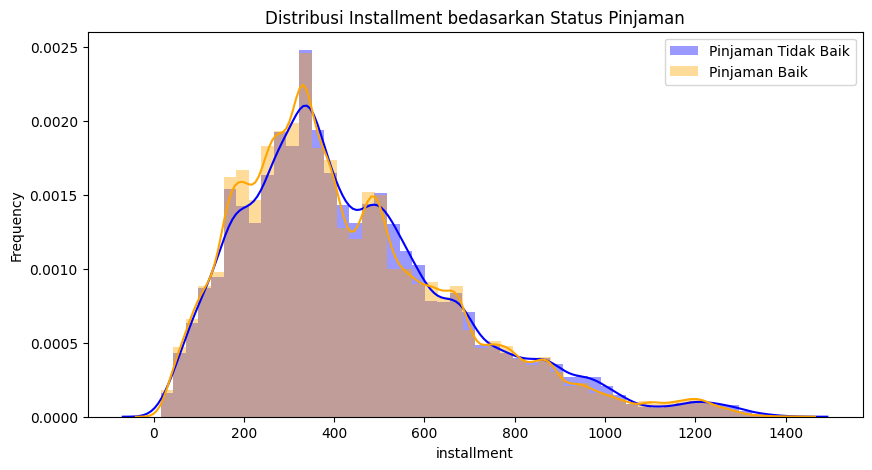

In [221]:
s1 = df_p1[df_p1['loan_status'] == 0]['installment']
s2 = df_p1[df_p1['loan_status'] == 1]['installment']

plt.figure(figsize=(10,5))
sns.distplot(s1,  color='blue', label='Pinjaman Tidak Baik')
sns.distplot(s2, color='orange', label='Pinjaman Baik')
plt.title('Distribusi Installment bedasarkan Status Pinjaman')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-134-b06544144794>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_p1, x='loan_status', y='loan_amnt', palette = 'pastel')


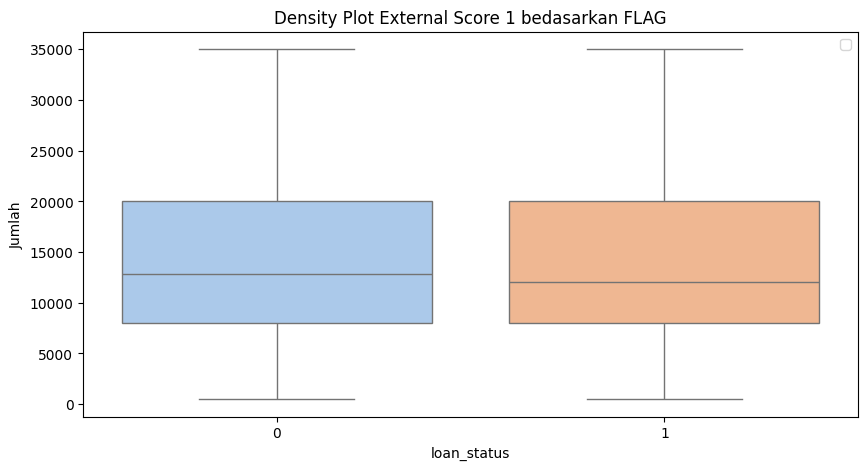

In [134]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df_p1, x='loan_status', y='loan_amnt', palette = 'pastel')
plt.title('Loan Amount bedasarkan Loan Status')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

**JAWAB:**<br>

Tidak terdapat perbedaan yang signifikan diantara kedua status pinjaman, baik untuk nilai Loan Amount atau untuk Installment.


#### 3.5 - Bagaimana perbandingan beberapa variabel kategorik untuk setiap status pinjaman?

<ipython-input-144-aeef8f2f7292>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45);
<ipython-input-144-aeef8f2f7292>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  e.set_xticklabels(e.get_xticklabels(), rotation=90);


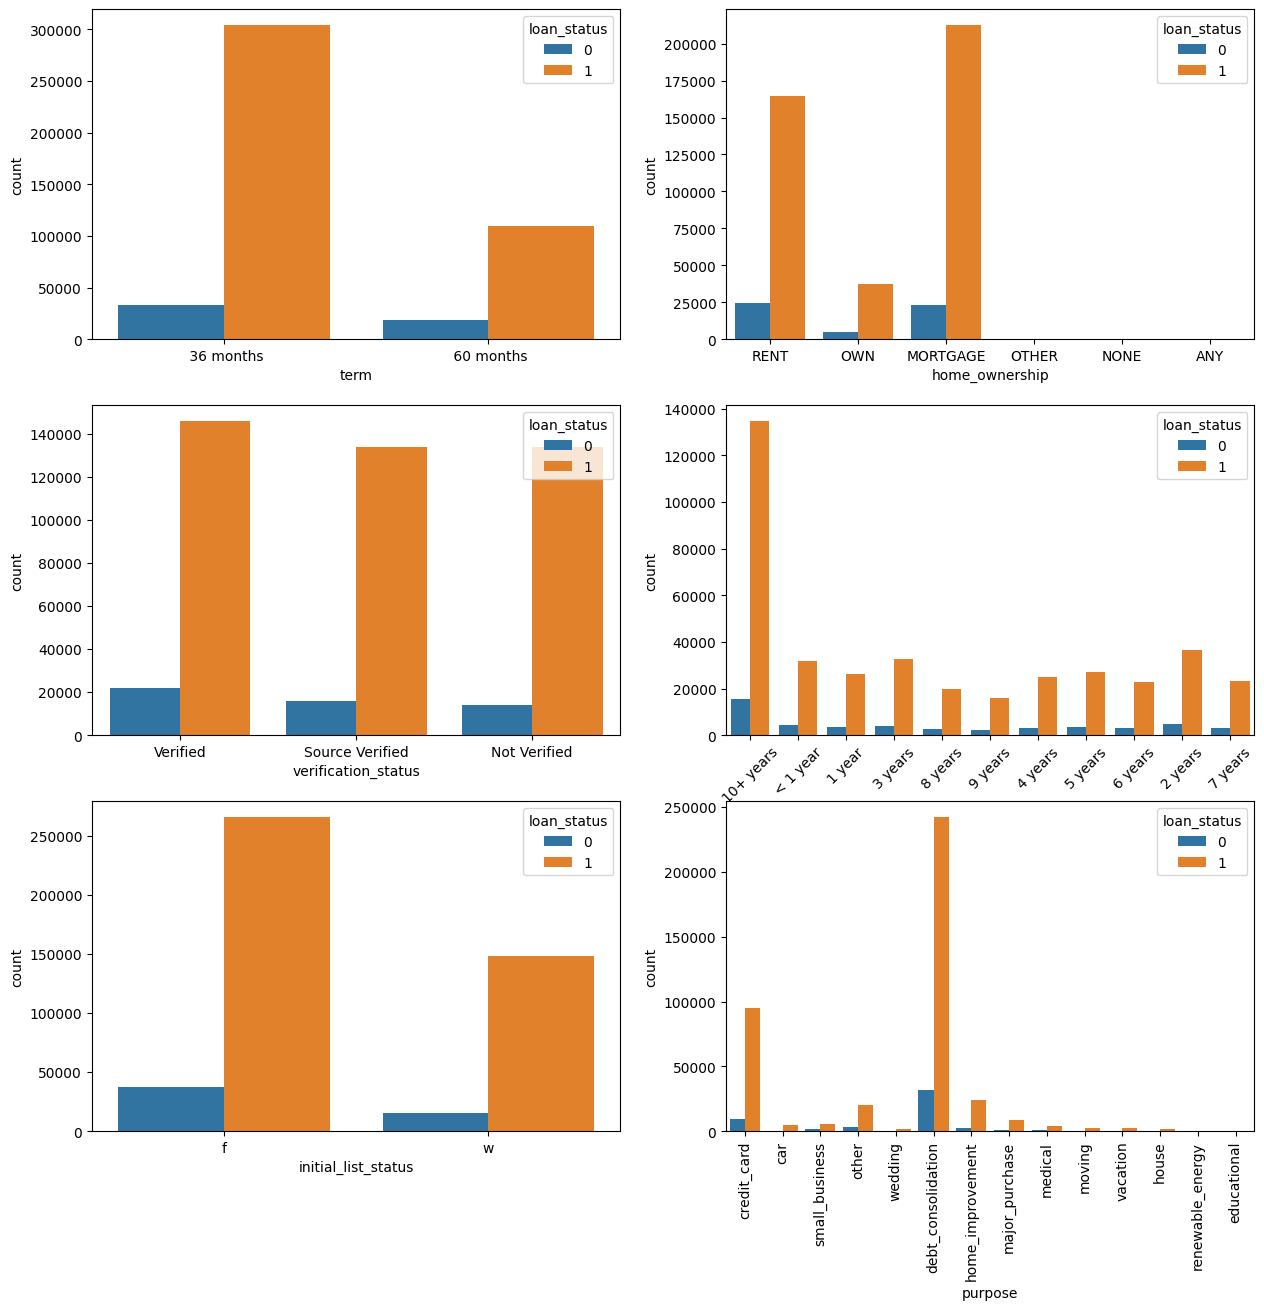

In [144]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='term', data=df_p1, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='home_ownership', data=df_p1, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='verification_status', data=df_p1, hue='loan_status')

plt.subplot(6, 2, 4)
g = sns.countplot(x='emp_length', data=df_p1, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(6, 2, 5)
sns.countplot(x='initial_list_status', data=df_p1, hue='loan_status')

plt.subplot(6, 2, 6)
e = sns.countplot(x='purpose', data=df_p1, hue='loan_status')
e.set_xticklabels(e.get_xticklabels(), rotation=90);

<a name="3"></a>
## 4 - Feature Engineering dan Preprocessing Data (1.2)
Akan dilakukan beberapa proses ekstraksi fitur

In [146]:
df4 = df_p1.copy()

In [149]:
df4['month_issue_since_crline'] = (df4['issue_d'].dt.year - df4['earliest_cr_line'].dt.year) * 12 + (df4['issue_d'].dt.month - df4['earliest_cr_line'].dt.month)


In [150]:
df4['month_last_pymnt_since_issue'] = (df4['last_pymnt_d'].dt.year - df4['issue_d'].dt.year) * 12 + (df4['last_pymnt_d'].dt.month - df4['issue_d'].dt.month)

In [152]:
df4[['month_issue_since_crline', 'month_last_pymnt_since_issue']].head()

,month_issue_since_crline,month_last_pymnt_since_issue
0,323.0,37.0
1,152.0,16.0
2,121.0,30.0
3,190.0,37.0
4,191.0,49.0


In [159]:
df4 = df4.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], axis =1)
df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,month_issue_since_crline,month_last_pymnt_since_issue
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.00,171.62,0.0,NaN,0.0,NaN,NaN,NaN,323.0,37.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1.11,119.66,0.0,NaN,0.0,NaN,NaN,NaN,152.0,16.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.00,649.91,0.0,NaN,0.0,NaN,NaN,NaN,121.0,30.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.00,357.48,0.0,NaN,0.0,NaN,NaN,NaN,190.0,37.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,0.00,67.79,0.0,NaN,0.0,NaN,NaN,NaN,191.0,49.0


Selanjutnya akan dilakukan deteksi outlier dan menghapus data apabila terdapat lebih dari 5 kolom yang memiliki outlier.

In [158]:
def detect_outliers_IQR(df):
    outliers = pd.DataFrame(index=df.index)
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

In [162]:
df5 = df4.copy()
numerical_cols = df5.select_dtypes(include=[np.number]).columns

outliers = detect_outliers_IQR(df5[numerical_cols])

# Menambahkan kolom yang menghitung jumlah kategori yang memiliki outlier untuk setiap baris
df5['Outlier_Count'] = outliers.sum(axis=1)

# Menghapus baris yang memiliki outlier di lebih dari 5 kategori
filtered_df = df5[df5['Outlier_Count'] <= 5].drop(columns=['Outlier_Count'])

df5.info()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     466285 non-null  int64  
 1   funded_amnt                   466285 non-null  int64  
 2   funded_amnt_inv               466285 non-null  float64
 3   term                          466285 non-null  object 
 4   int_rate                      466285 non-null  float64
 5   installment                   466285 non-null  float64
 6   grade                         466285 non-null  object 
 7   sub_grade                     466285 non-null  object 
 8   emp_length                    445277 non-null  object 
 9   home_ownership                466285 non-null  object 
 10  annual_inc                    466281 non-null  float64
 11  verification_status           466285 non-null  object 
 12  loan_status                   466285 non-nul

In [163]:
data =filtered_df.copy()

<a name="5"></a>
## 5 - Splitting Data
- Agar mempermudah analisis, train.csv dibagi menjadi 2 bagian, yaitu data train dan data tes.

In [191]:
from sklearn.model_selection import train_test_split
X = data.drop('loan_status', axis =1)
y = data['loan_status']

X_train, X_test, y_train, y_test = (train_test_split(X,y,test_size=0.2, stratify=y, random_state=0))

In [192]:
y_train.value_counts()

loan_status
1    322425
0     39926
Name: count, dtype: int64

<a name="6"></a>

## 6 - Preprocessing Data (2) - Pipeline
- Beberapa tahapan preprocessing data menggunakan operator `pipeline` pada scikit-learn agar lebih mudah digunakan dan menghindari kemungkinan terjadinya kebocoran (leakage) data tes saat pemodelan.

In [175]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

class NumImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        numeric = X.select_dtypes(include=['int64', 'float64']).columns
        X[numeric] = IterativeImputer().fit_transform(X[numeric])
        return X

class CatImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cat = X.select_dtypes(include=['object']).columns
        X[cat] = SimpleImputer(strategy = 'most_frequent').fit_transform(X[cat])
        return X

class scaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        num = X.select_dtypes(include=['int64', 'float64']).columns
        X[num] = MinMaxScaler().fit_transform(X[num])
        return X

class OrdinalEnc(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        oe = OrdinalEncoder(categories=[['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']])
        X['emp_length'] = oe.fit_transform(X[['emp_length']])
        return X

class Labelenc(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns

        # Inisialisasi LabelEncoder
        label_encoders = {}

        # Lakukan label encoding untuk setiap kolom kategorik
        for col in categorical_cols:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le
        return X

In [176]:
from sklearn.pipeline import Pipeline

pipe_prepo = Pipeline([
    ('num_imputer', NumImputer()),
    ('cat_imputer', CatImputer()),
    ('scaler', scaler()),
    ('ordinal encoder', OrdinalEnc()),
    ('label encoder', Labelenc())
])

In [177]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362351 entries, 142776 to 314794
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     362351 non-null  int64  
 1   funded_amnt                   362351 non-null  int64  
 2   funded_amnt_inv               362351 non-null  float64
 3   term                          362351 non-null  object 
 4   int_rate                      362351 non-null  float64
 5   installment                   362351 non-null  float64
 6   grade                         362351 non-null  object 
 7   sub_grade                     362351 non-null  object 
 8   emp_length                    345886 non-null  object 
 9   home_ownership                362351 non-null  object 
 10  annual_inc                    362348 non-null  float64
 11  verification_status           362351 non-null  object 
 12  pymnt_plan                    362351 non-nul

In [198]:
X_train = pipe_prepo.fit_transform(X_train)

In [199]:
X_test = pipe_prepo.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [200]:
display(X_train.head(), X_test.head())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,month_issue_since_crline,month_last_pymnt_since_issue
216203,0.344928,0.344928,0.354286,0,0.526647,0.303348,2,14,1.0,1,...,0.0,0.195759,0.001133,0.846315,0.000273,0.013174,0.450643,0.024427,0.641227,0.476846
182311,0.776812,0.776812,0.780000,0,0.420058,0.660212,1,9,4.0,1,...,0.0,0.025911,0.001133,0.881076,0.000273,0.013130,0.463546,0.022954,0.753737,0.644255
259249,0.130435,0.130435,0.142857,0,0.245640,0.105524,1,7,0.0,5,...,0.0,0.004508,0.001133,0.817572,0.000273,0.013130,0.441327,0.021523,0.680566,0.414067
316073,0.420290,0.420290,0.428571,1,0.384205,0.235974,2,11,10.0,1,...,0.0,0.009544,0.001133,0.818474,0.000273,0.013130,0.452991,0.023434,0.825334,0.434993
212103,0.194203,0.194203,0.205714,0,0.324612,0.160917,1,7,1.0,5,...,0.0,0.006722,0.001133,0.846451,0.000273,0.013178,0.443917,0.021760,0.609756,0.644255


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,month_issue_since_crline,month_last_pymnt_since_issue
332529,0.420290,0.420290,0.428571,0,0.181686,0.339775,1,5,9.0,0,...,0.000000,0.335281,0.001395,0.826767,0.000077,0.120204,0.384405,0.034439,0.657120,0.384649
184282,0.565217,0.565217,0.571429,1,0.479167,0.340416,2,11,6.0,0,...,0.001619,0.013221,0.001395,0.838001,0.000077,0.120204,0.397877,0.031832,0.684169,0.326597
344376,0.600000,0.600000,0.605714,1,0.754360,0.409912,4,23,7.0,4,...,0.000000,0.015825,0.001395,0.829403,0.000077,0.120204,0.354193,0.032966,0.733492,0.489142
8661,0.107246,0.107246,0.120000,0,0.269864,0.088851,1,7,8.0,0,...,0.000000,0.053786,0.001395,0.828351,0.000077,0.122887,0.350403,0.033341,0.655529,0.547194
454469,0.086957,0.086957,0.100000,0,0.438469,0.076286,2,11,3.0,0,...,0.000000,0.003324,0.001395,0.828275,0.000077,0.120204,0.362125,0.032510,0.600636,0.547194


In [201]:
X_train.isna().sum().sum()
X_test.isna().sum().sum()

0

<a name="7"></a>
## 7 - Pemodelan
- akan digunakan beberapa model klasifikasi dimana akan memasukkan model Logistic regression juga

**Metrik evaluasi** yang digunakan dan alasannya:
1. **Balance accuracy**, proporsi kelas dengan nilai `FLAG` 1 dan 0 sangatlah tidak seimbang. Dikarenakan ketika data splitting tidak dilakukan penanganan imbalance data. Oleh karena itu, metrik klasifikasi akurasi kurang cocok dan menyesatkan dikarenakan perhitungan akurasi dapat mencapai nilai yang tinggi hanya dengan memprediksi kelas mayoritas secara konsisten. Balance accuracy melakukan perhitungan akurasi dengan mempertimbangkan kelas yang imbalance. Metrik ini juga memberikan gambaran yang lebih realistis dikarenakan melakukan perhitungan untuk kedua kelas dengan cara yang lebih seimbang.
2. **F1-score**, metrik ini cocok untuk data yang imbalance dikarenakan f1-score memperhitungkan nilai precision dan recall sehingga memberikan gambaran yang lebih baik mengenai performa model pada kelas minoritas. F1-score ini juga menunjukkan keseimbangan antara precision dan recall dimana nilai keduanya bisa saja bervariasi secara signifikan.
3. **ROC AUC**, metrik ini merupakan metrik yang umum digunakan untuk data imbalance. Hal ini dikarenakan ROC AUC tidak sensitif terhadap perubahan proporsi kelas. Selain itu, metrik ini juga mengatasi imbalance class karena mempertimbangkan semua tingkat sensitivitas dan spesifisitas.

In [195]:
# pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.5 MB/s eta 0:00:00


In [203]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score, balanced_accuracy_score
# Daftar model yang akan digunakan
list_model = [
    LogisticRegression(random_state=0),
    LogisticRegressionCV(random_state=0),
    GradientBoostingClassifier(random_state=0),
    HistGradientBoostingClassifier(random_state=0),
    CatBoostClassifier(random_state=0),
    XGBClassifier(random_state=0),
    BernoulliNB(),
    GaussianNB(),
    MultinomialNB(),
    KNeighborsClassifier()
]

# List kosong untuk menyimpan semua hasil pengukuran
result = []

for model in list_model:
    # Buat pipeline dengan scaler dan model
    pipeline = Pipeline([
        ('classifier', model)
    ])

    # Fit model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
    bal_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

    # Kumpulkan nilai-nilai di atas menjadi satu
    hasil = {
        'Model': type(model).__name__,
        'Balanced Accuracy': bal_accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Simpan nilai model ini dalam list result
    result.append(hasil)

# Ubah menjadi dataframe
result_all = pd.DataFrame(result)
print(result_all)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Learning rate set to 0.127551
0:	learn: 0.4892055	total: 182ms	remaining: 3m 1s
1:	learn: 0.3634950	total: 293ms	remaining: 2m 26s
2:	learn: 0.2701312	total: 413ms	remaining: 2m 17s
3:	learn: 0.2107410	total: 530ms	remaining: 2m 11s
4:	learn: 0.1788590	total: 645ms	remaining: 2m 8s
5:	learn: 0.1560910	total: 760ms	remaining: 2m 5s
6:	learn: 0.1356566	total: 881ms	remaining: 2m 5s
7:	learn: 0.1217241	total: 1.02s	remaining: 2m 6s
8:	learn: 0.1130163	total: 1.12s	remaining: 2m 3s
9:	learn: 0.1055597	total: 1.24s	remaining: 2m 2s
10:	learn: 0.1021848	total: 1.35s	remaining: 2m 1s
11:	learn: 0.0977863	total: 1.47s	remaining: 2m 1s
12:	learn: 0.0947226	total: 1.59s	remaining: 2m
13:	learn: 0.0925901	total: 1.69s	remaining: 1m 59s
14:	learn: 0.0910997	total: 1.8s	remaining: 1m 58s
15:	learn: 0.0891119	total: 1.92s	remaining: 1m 58s
16:	learn: 0.0882094	total: 2.11s	remaining: 2m 2s
17:	learn: 0.0867701	total: 2.34s	remaining: 2m 7s
18:	learn: 0.0852873	total: 2.59s	remaining: 2m 13s
19:	lear

In [204]:
result_all

,Model,Balanced Accuracy,F1 Score,ROC AUC
0,LogisticRegression,0.870519,0.984000,0.944706
1,LogisticRegressionCV,0.898221,0.987160,0.966794
2,GradientBoostingClassifier,0.906183,0.988341,0.967906
3,HistGradientBoostingClassifier,0.915520,0.989314,0.970526
4,CatBoostClassifier,0.917042,0.989515,0.971599
5,XGBClassifier,0.921413,0.989926,0.973195
6,BernoulliNB,0.731684,0.890018,0.817419
7,GaussianNB,0.560797,0.948405,0.560897
8,MultinomialNB,0.619961,0.912043,0.731173
9,KNeighborsClassifier,0.531134,0.938886,0.633634


### Model Terbaik

Dipilih model terbaik yaitu klasifikasi dengan metode XGBClassifier(random_state=0) karena menghasilkan Balanced Accuracy, F1-score, dan ROC AUC yang tertinggi dibandingkan seluruh model yang lain.

In [205]:
best = Pipeline([
        ('classifier', XGBClassifier(random_state=0))
    ])
best.fit(X_train, y_train) # fitting model terbaik menggunakan data latih

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

<a name="8"></a>
## 8 - Evaluation


In [207]:
# Prediksi
Y_pred = best.predict(X_test)

# Cek report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

# add other
bal_accuracy = balanced_accuracy_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred, average='binary')
roc_auc = roc_auc_score(y_test, best.predict_proba(X_test)[:, 1])

# menampilkan score metrik
print(f'Balance Aquracy = {bal_accuracy}\nF1 score \t= {f1}\nROC AUC \t= {roc_auc}')

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      9982
           1       0.98      1.00      0.99     80606

    accuracy                           0.98     90588
   macro avg       0.99      0.92      0.95     90588
weighted avg       0.98      0.98      0.98     90588

Balance Aquracy = 0.9214131960119586
F1 score 	= 0.9899256873459503
ROC AUC 	= 0.9731949455773735


## 9 - Conclusion

Beberapa langkah dalam peningkatan performa model klasifikasi dapat dilakukan dengan cara berikut:

- Melakukan penanganan data imbalance dalam data splitting
- Melakukan cross validation untuk menenjukan hyperparameter
- Melakukan imputasi missing value dengan algoritma machine learning terutama untuk variabel kategorik.

Dengan model ini (atau model yang sudah ditingkatkan) Lending Club dapat menggunakannya untuk **menekan** **risiko** **kerugian** **akibat** **ketidaktepatan** **pemberian** **pinjaman** **kepada customer**. Model yang telah dikembangkan menunjukkan **performa yang luar** **biasa** menggunakan algoritma XG Boost Classifier. Dengan mengimplementasikan ini, Lending Club dapat mengurangi kemungkinan memberikan pinjaman ke calon peminjam yang dirasa tidak akan membayar pinjaman secara penuh. Dampaknya, Lending Club akan dapat secara tepat sasaran memberikan pinjaman ke calon peminjam yang layak dengan karakteristik tertentu.